## Домашнее задание по теме: "Ансамблирование"

Описание задания:

В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

### 1. Получите данные и загрузите их в рабочую среду.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [ ]:
# загрузка csv в google colab
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [ ]:
df = pd.read_csv('./heart.csv')
df_bak = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Подготовьте датасет к обучению моделей.

a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])

# one hot encoding
df = pd.get_dummies(df, columns=['ChestPainType'])
df = pd.get_dummies(df, columns=['RestingECG'])
df = pd.get_dummies(df, columns=['ST_Slope'])

In [ ]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


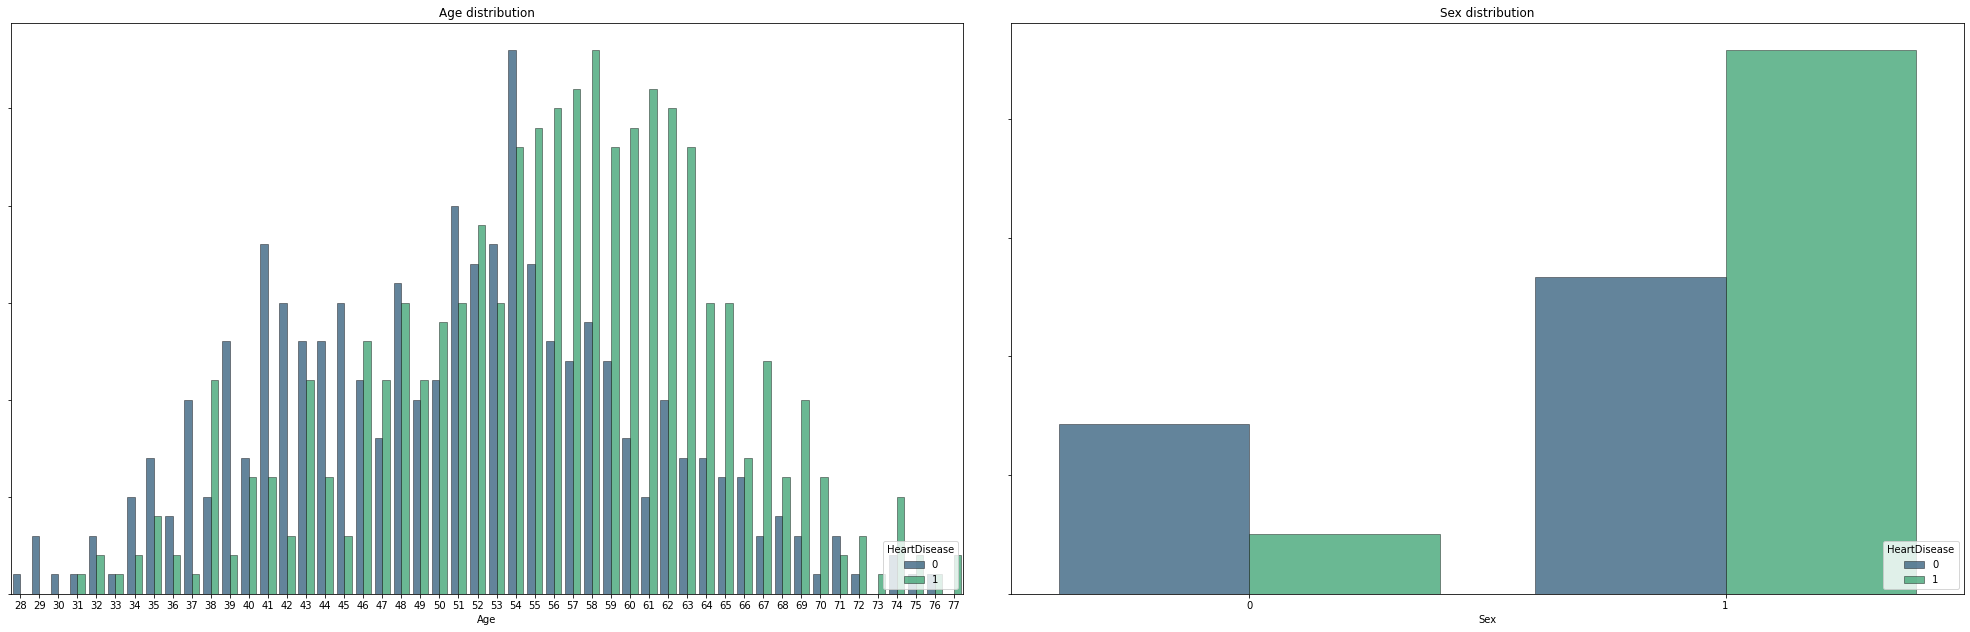

In [ ]:
# графики распределения по полу и возрасту
selectedColumns = df[['Age', 'Sex']]
fg, ax = plt.subplots(1, 2, figsize = (35, 10.5))

for num, col in enumerate(selectedColumns):
    sns.countplot(data = df,
                  x = col,
                  ax = ax[num],
                  hue = df['HeartDisease'],
                  palette = 'viridis',
                  edgecolor = 'black',
                  alpha = 0.8,
                  linewidth = 0.5).set(yticklabels = [], ylabel = None)

    sns.move_legend(ax[num], "lower right")
    ax[num].set_title(f'{col} distribution')

plt.subplots_adjust(wspace = 0.05, hspace = 0.35)
plt.show()

### 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [ ]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:

a) tree.DecisionTreeClassifier

b) ensemble.RandomForestClassifier

In [ ]:
# обучение модели по методу дерева решений
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# обучение модели по методу случайного леса
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

In [ ]:
from sklearn.metrics import classification_report
print('Метрики для модели обученной по методу "дерева решений":\n')
print(classification_report(y_test, dtc.predict(X_test)))
print('-----------------------------------------------------\n')
print('Метрики для модели обученной по методу "случайного леса":\n')
print(classification_report(y_test, rfc.predict(X_test)))

Метрики для модели обученной по методу "дерева решений":

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        77
           1       0.88      0.79      0.83       107

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184

-----------------------------------------------------

Метрики для модели обученной по методу "случайного леса":

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        77
           1       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



### 6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

In [ ]:
def feature_importances(X, model):
    features = list(X.columns)
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.title('Важность признаков')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.show()

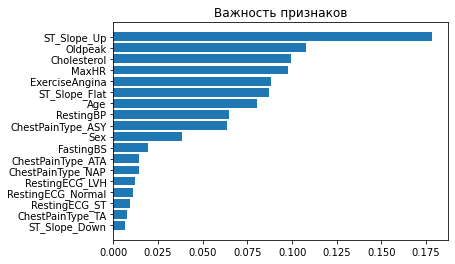

In [ ]:
# важность признаков в модели на основе алгоритма случайного леса
feature_importances(X, rfc)

### 7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.

a) Повторите п. 5

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(dtc, max_samples=0.6, max_features=0.77, random_state=42)
bg = bagging.fit(X_train, y_train)

In [ ]:
print('Метрики для модели обученной по методу "бэггинг":\n')
print(classification_report(y_test, bagging.predict(X_test)))

Метрики для модели обученной по методу "бэггинг":

              precision    recall  f1-score   support

           0       0.78      0.92      0.85        77
           1       0.94      0.81      0.87       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



### 8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.

a) Повторите п. 5

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

classifier = StackingClassifier(
    estimators=
    [
        ('DecisionTreeClassifier', dtc),
        ('RandomForestClassifier', rfc),
        ('LinearSVC', LinearSVC(dual=False))
    ],
    final_estimator=LogisticRegression()
)

In [ ]:
classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('DecisionTreeClassifier',
                                DecisionTreeClassifier(random_state=42)),
                               ('RandomForestClassifier',
                                RandomForestClassifier(random_state=42)),
                               ('LinearSVC', LinearSVC(dual=False))],
                   final_estimator=LogisticRegression())

In [ ]:
print('Метрики для модели обученной по методу "стэккинг":\n')
print(classification_report(y_test, classifier.predict(X_test)))

Метрики для модели обученной по методу "стэккинг":

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



### 10. Сформулируйте выводы по проделанной работе.

a) Сравните метрики построенных моделей.

b) Напишите свое мнение, какая модель наилучшая и почему.

Результаты:

| | accuracy f1-score |
|-|-|
| DecisionTreeClassifier | 0.81 |
| RandomForestClassifier | 0.88 |
| BaggingClassifier | 0.86 |
| StackingClassifier | 0.88 |

Исходя из полученных метрик видно, что при использовании различных методов наилучшие показатели у метода "случайного леса" (на основе всех метрик). Но думаю, что если потратить больше времени и поискать наилучшие параметры есть возможность добиться иных (лучших)) результатов. 

Думаю что алгоритм случайно леса наилучший, т.к. с точки зрения базового с него легко начинать и вследствии сравнивать метрики других алгоритмов уже с ним.